#INCLUSÃO DAS BIBLIOTECAS QUE SERÃO NECESSÁRIAS NO DECORRER DO CÓDIGO


1.   Pandas: inclusão dos dados em um dataframe
2.   Numpy: biblioteca númerica para *comparações*
3.   Matplotlib: inclusão da biblioteca *pyplot* para geração de gráficos
4.   Seaborn: biblioteca de geração de visualização de dados
5.   Sklearn: somente biblioteca de Matriz de Contingência



In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#CARGA DOS ARQUIVOS DE TREINO

- Devido ao tamanho original do arquivo foi necessário particioná-lo em 2 para que o Github aceitasse os arquivos e pudessemos fazer uma leitura direta dele no local de armazenamento, independente do programa gerar de código usado.

In [85]:
# Parte 1 do arquivo
url = 'https://raw.githubusercontent.com/danilosrm/projeto_MDD/main/00%20-%20FONTES/01%20-%20TRAIN/train_01.csv'
  
df_train = pd.read_csv(url, error_bad_lines=False, delimiter=';')
print('Quantidade registro da primeira parte: ', df_train['id'].count())

# Parte 2 do arquivo 
url = 'https://raw.githubusercontent.com/danilosrm/projeto_MDD/main/00%20-%20FONTES/01%20-%20TRAIN/train_02.csv'  
  
df2_train = pd.read_csv(url, error_bad_lines=False, delimiter=';')
print('Quantidade registro da segunda parte: ', df2_train['id'].count())

# Junção das partes  
df_train = df_train.append(df2_train)
print('Quantidade total registros: ', df_train['id'].count())


Quantidade registro da primeira parte:  297605
Quantidade registro da segunda parte:  297607
Quantidade total registros:  595212


In [ ]:
#Analise inicial dos dados carregados, verificando se existem campos com valores nulos. 

df_train.info(0)

In [ ]:
# Demonstração dos 5 primeiras linhas de registros de forma Transversal

df_train.head(5).T

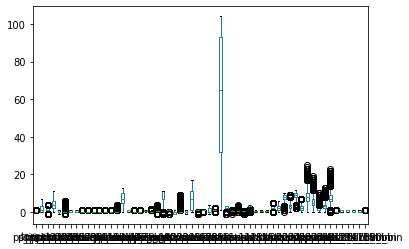

In [88]:
# Tentativa de geração da plotagem das colunas existentes, porém como a quantidade é elevado, o gráfico acaba ficando
# de forma desconfigurada e com o entendimento totalmente ilegivel. 
# Ainda é possível ver uma coluna que destoa das demais, sem conseguir identificar.

# Retirado a coluna "id" que faz a identificação dos registros.
df_train.drop('id', axis=1).plot.box()

# Analise da Coluna Target

In [89]:
# Idenficação do valor Mínimo e Máximo

print('Valor mínimo do coluna Target: ', df_train['target'].min())
print('Valor maximo do coluna Target: ', df_train['target'].max())

Valor mínimo do coluna Target:  0
Valor maximo do coluna Target:  1


In [90]:
# Quantidade de registros para cada valor da coluna 'Target'

qtd_target = df_train['target'].value_counts()

print(qtd_target)

0    573518
1     21694
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


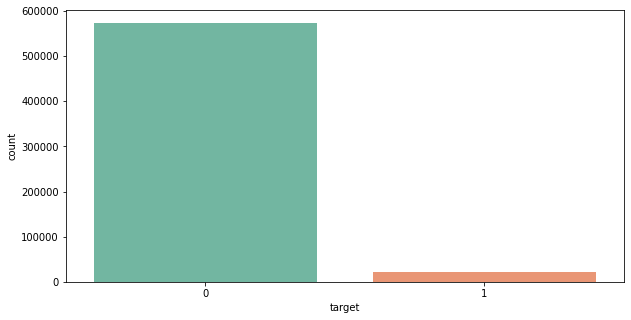

In [91]:
# Gráfico da coluna "Target", utilizando a biblioteca "matplotlib" 
# O intuido é demonstrar a diferença na quantidade de registros entre os valores da coluna

plt.figure(figsize=(10,5))
sns.countplot(df_train['target'], palette="Set2")

## ANALISE DO RESULTADO:
***
### Quantidade de registros que não solicitam sinistro é muito alto, o que compromete a previsão dos dados.

***

# Separação das colunas em 8 grupos

Inteção é facilitar a análise em grupos separadas, mas que parecem ser da mesma característica.

* "n" indica a numeração da coluna.

1.   **df_ps_ind**: colunas "ps_ind_n".
2.   **df_ps_ind_cat**: colunas "ps_ind_n_cat".
3.   **df_ps_ind_bin**: colunas "ps_ind_n_bin".
4.   **df_ps_reg**: colunas "ps_ps_reg_n".
5.   **df_ps_car**: colunas "ps_car_n".
6.   **df_ps_car_cat**: colunas "ps_car_n_cat".
7.   **df_ps_cal**: colunas "ps_cal_n".
8.   **df_ps_cal_bin**: colunas "ps_car_bin".






In [92]:
# LISTA DAS COLUNAS CONFORME GRUPOS

lista_ps_ind = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15']

lista_ps_ind_cat = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat']

lista_ps_ind_bin = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin','ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
                    'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']

lista_ps_reg = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03']         

lista_ps_car = ['ps_car_11','ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'] 

lista_ps_car_cat = ['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat','ps_car_05_cat', 'ps_car_06_cat', 
                    'ps_car_07_cat', 'ps_car_08_cat','ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']  

lista_ps_cal = [ 'ps_calc_01','ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06','ps_calc_07', 
                'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11','ps_calc_12', 'ps_calc_13', 'ps_calc_14']

lista_ps_cal_bin = [ 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']



##**GRUPO 1**


In [ ]:
# Elimina do Data Frame as colunas que não possuem característica de nome parecido

df_ps_ind = df_train

lista =  lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_ind = df_ps_ind.drop(lista, axis=1)

# Retira a coluna "id" para geração estatistica

df_ps_ind.drop('id', axis=1).describe()

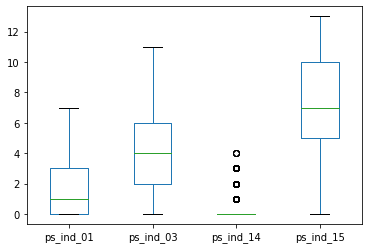

In [ ]:
# Gera um gráfico do tipo Boxplot, porém desconsiderando as colunas "ID" e "TARGET"
# Coluna "ID" é somente para associação com dados de outros grupos, mas que possuem mesmo "ID"

lista_id_target = ['id', 'target']
df_ps_ind.drop(lista_id_target, axis=1).plot.box()

Quantidade de registros por dimensão na coluna PS_IND_14
0    588832
1      5495
2       744
3       136
4         5
Name: ps_ind_14, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


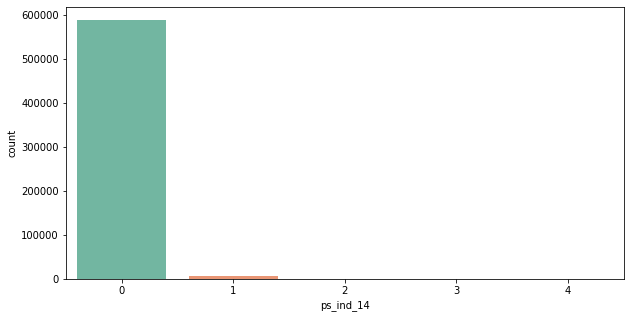

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_ind_14"

qtd_outliers = df_ps_ind['ps_ind_14'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_IND_14')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(10,5))
sns.countplot(df_ps_ind['ps_ind_14'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

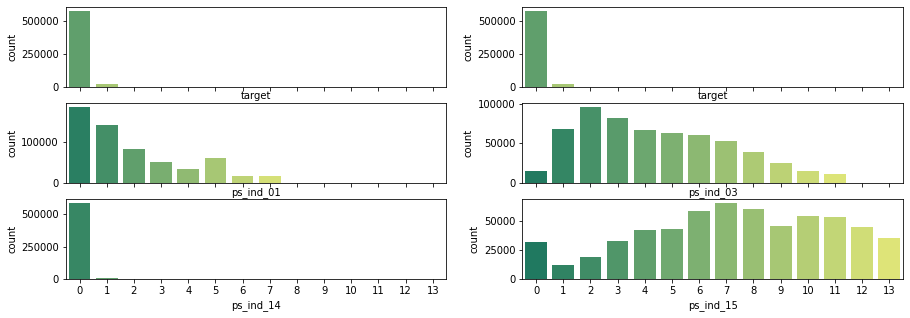

In [ ]:
# Grupo 1: Index(['id', 'target', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15'], dtype='object')
# Gráfico de cada coluna por quantidade de registros por tipo de dado.

fig,ax = plt.subplots(3,2,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4, ax5, ax6 = ax.flatten()
sns.countplot(df_ps_ind['target'],palette='summer',ax=ax1)
sns.countplot(df_ps_ind['target'],palette='summer',ax=ax2)
sns.countplot(df_ps_ind['ps_ind_01'],palette='summer',ax=ax3)
sns.countplot(df_ps_ind['ps_ind_03'],palette='summer',ax=ax4)
sns.countplot(df_ps_ind['ps_ind_14'],palette='summer',ax=ax5)
sns.countplot(df_ps_ind['ps_ind_15'],palette='summer',ax=ax6)


## ANALISE DO RESULTADO - GRUPO 1:
***
### Graficos demonstram que existem diversos valores para tipos de colunas diferentes.
### Atenção para coluna "ps_ind_14", onde analise separada demonstrou que coluna possui 4 tipos de valores, porém a maioria dos registros são de valor zerado.

***


##**GRUPO 2**

In [ ]:
# Elimina do Data Frame as colunas que não possuem característica de nome parecido

df_ps_ind_cat = df_train

lista =  lista_ps_ind + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_ind_cat = df_ps_ind_cat.drop(lista, axis=1)


# Retira a coluna "id" para geração estatistica

df_ps_ind_cat.drop('id', axis=1).describe()

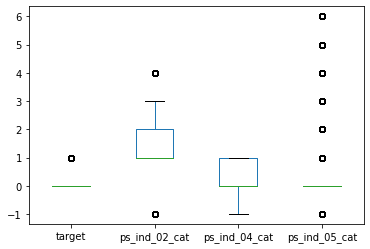

In [ ]:
# Gera um gráfico do tipo Boxplot, porém desconsiderando as colunas "ID" e "TARGET"
# Coluna "ID" é somente para associação com dados de outros grupos, mas que possuem mesmo "ID"

lista_id_target = ['id', 'target']
df_ps_ind_cat.drop('id', axis=1).plot.box()

Quantidade de registros por dimensão na coluna PS_IND_05_CAT
 0    528009
 6     20662
 4     18344
 1      8322
 3      8233
-1      5809
 2      4184
 5      1649
Name: ps_ind_05_cat, dtype: int64
*****************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


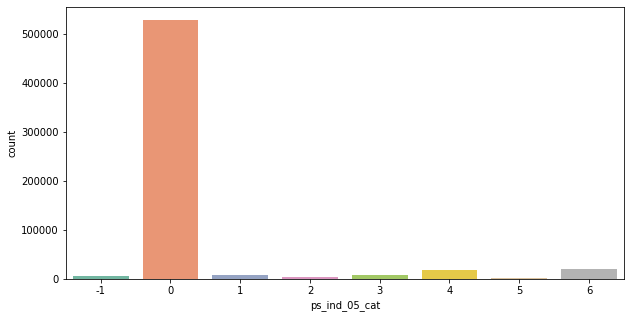

In [ ]:
# Analisando o gráfico anterior, vamos identificar os outliers pertencentes a coluna "ps_ind_05_cat"

qtd_outliers= df_ps_ind_cat['ps_ind_05_cat'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_IND_05_CAT')
print(qtd_outliers)

print("*****************************************************************************")


plt.figure(figsize=(10,5))
sns.countplot(df_ps_ind_cat['ps_ind_05_cat'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

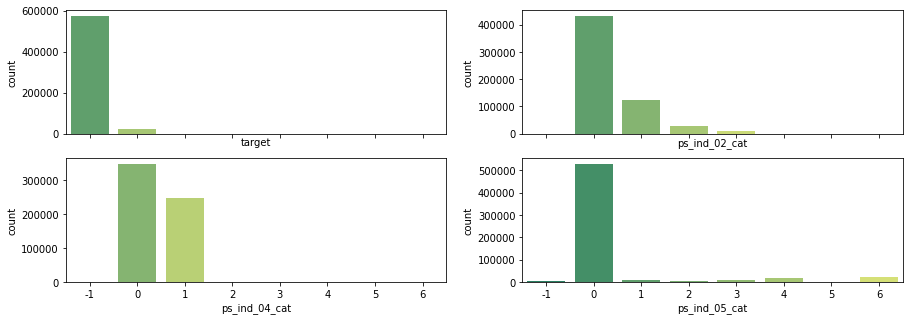

In [ ]:
# Grupo 2: Index(['id', 'target', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat'])
# Gráfico de cada coluna por quantidade de registros por tipo de dado.

fig,ax = plt.subplots(2,2,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df_ps_ind_cat['target'],palette='summer',ax=ax1)
sns.countplot(df_ps_ind_cat['ps_ind_02_cat'],palette='summer',ax=ax2)
sns.countplot(df_ps_ind_cat['ps_ind_04_cat'],palette='summer',ax=ax3)
sns.countplot(df_ps_ind_cat['ps_ind_05_cat'],palette='summer',ax=ax4)

## ANALISE DO RESULTADO - GRUPO 2:
***
### Verificado que existem colunas com valores negativos.
### Por descrição do problema, informado que valores negativos eram valores que estavam com valores sem preenchimento
***

##**GRUPO 3**

In [93]:
# Elimina do Data Frame as colunas que não possuem característica de nome parecido

df_ps_ind_bin = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_ind_bin = df_ps_ind_bin.drop(lista, axis=1)

# Retira a coluna "id" para geração estatistica

df_ps_ind_bin.drop('id', axis=1).describe().T

## Todos os valores estam entre 0 e 1.
## O que identifica que esse conjunto é binario

,count,mean,std,min,25%,50%,75%,max
target,595212.0,0.036448,0.187401,0.0,0.0,0.0,0.0,1.0
ps_ind_06_bin,595212.0,0.393742,0.488579,0.0,0.0,0.0,1.0,1.0
ps_ind_07_bin,595212.0,0.257033,0.436998,0.0,0.0,0.0,1.0,1.0
ps_ind_08_bin,595212.0,0.163921,0.370205,0.0,0.0,0.0,0.0,1.0
ps_ind_09_bin,595212.0,0.185304,0.388544,0.0,0.0,0.0,0.0,1.0
ps_ind_10_bin,595212.0,0.000373,0.019309,0.0,0.0,0.0,0.0,1.0
ps_ind_11_bin,595212.0,0.001692,0.041097,0.0,0.0,0.0,0.0,1.0
ps_ind_12_bin,595212.0,0.009439,0.096693,0.0,0.0,0.0,0.0,1.0
ps_ind_13_bin,595212.0,0.000948,0.030768,0.0,0.0,0.0,0.0,1.0
ps_ind_16_bin,595212.0,0.660823,0.473430,0.0,0.0,1.0,1.0,1.0


In [117]:
# Geração dos valores da matriz comparando o Target com a coluna


print('Confusion matrix - TARGET x PS_IND_06_BIN ')
matrix = confusion_matrix(df_ps_ind_bin['target'],df_ps_ind_bin['ps_ind_06_bin'])
print(matrix)

print('\n*********************************************************************\n')

print('Confusion matrix - TARGET x PS_IND_07_BIN ')
matrix = confusion_matrix(df_ps_ind_bin['target'],df_ps_ind_bin['ps_ind_07_bin'])
print(matrix)

print('\n*********************************************************************\n')

print('Confusion matrix - TARGET x PS_IND_10_BIN ')
matrix = confusion_matrix(df_ps_ind_bin['target'],df_ps_ind_bin['ps_ind_10_bin'])
print(matrix)

Confusion matrix - TARGET x PS_IND_06_BIN 
[[345846 227672]
 [ 15006   6688]]

*********************************************************************

Confusion matrix - TARGET x PS_IND_07_BIN 
[[427773 145745]
 [ 14450   7244]]

*********************************************************************

Confusion matrix - TARGET x PS_IND_10_BIN 
[[573308    210]
 [ 21682     12]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

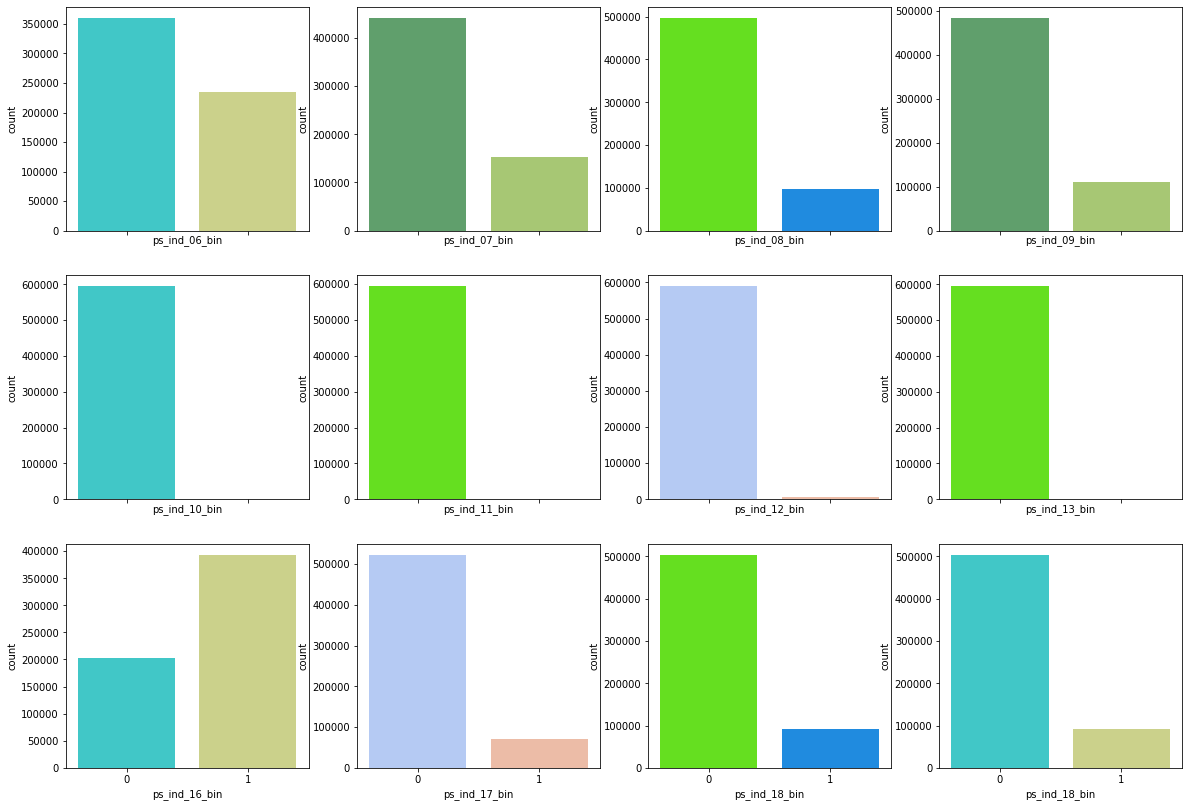

In [114]:
# Grupo 3: Index(['id', 'target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
#                                 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin')

fig,ax = plt.subplots(3,4,figsize=(20,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12 = ax.flatten()
sns.countplot(df_ps_ind_bin['ps_ind_06_bin'],palette='rainbow',ax=ax1)
sns.countplot(df_ps_ind_bin['ps_ind_07_bin'],palette='summer',ax=ax2)
sns.countplot(df_ps_ind_bin['ps_ind_08_bin'],palette='gist_rainbow',ax=ax3)
sns.countplot(df_ps_ind_bin['ps_ind_09_bin'],palette='summer',ax=ax4)
sns.countplot(df_ps_ind_bin['ps_ind_10_bin'],palette='rainbow',ax=ax5)
sns.countplot(df_ps_ind_bin['ps_ind_11_bin'],palette='gist_rainbow',ax=ax6)
sns.countplot(df_ps_ind_bin['ps_ind_12_bin'],palette='coolwarm',ax=ax7)
sns.countplot(df_ps_ind_bin['ps_ind_13_bin'],palette='gist_rainbow',ax=ax8)
sns.countplot(df_ps_ind_bin['ps_ind_16_bin'],palette='rainbow',ax=ax9)
sns.countplot(df_ps_ind_bin['ps_ind_17_bin'],palette='coolwarm',ax=ax10)
sns.countplot(df_ps_ind_bin['ps_ind_18_bin'],palette='gist_rainbow',ax=ax11)
sns.countplot(df_ps_ind_bin['ps_ind_18_bin'],palette='rainbow',ax=ax12)

##**GRUPO 4**

In [ ]:
df_ps_reg = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_reg = df_ps_reg.drop(lista, axis=1)

df_ps_reg.describe()

,id,target,ps_reg_01,ps_reg_02,ps_reg_03
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,0.610991,0.439184,0.551102
std,4.293678e+05,0.187401,0.287643,0.404264,0.793506
min,7.000000e+00,0.000000,0.000000,0.000000,-1.000000
25%,3.719915e+05,0.000000,0.400000,0.200000,0.525000
50%,7.435475e+05,0.000000,0.700000,0.300000,0.720677
75%,1.115549e+06,0.000000,0.900000,0.600000,1.000000
max,1.488027e+06,1.000000,0.900000,1.800000,4.037945


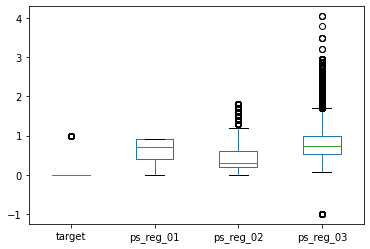

In [ ]:
df_ps_reg.drop('id', axis=1).plot.box()

##**GRUPO 5**

In [ ]:
df_ps_car = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_car = df_ps_car.drop(lista, axis=1)

df_ps_car.describe()

,id,target,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,2.346072,0.379945,0.813265,0.276256,3.065899
std,4.293678e+05,0.187401,0.832548,0.058327,0.224588,0.357154,0.731366
min,7.000000e+00,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000
25%,3.719915e+05,0.000000,2.000000,0.316228,0.670867,0.333167,2.828427
50%,7.435475e+05,0.000000,3.000000,0.374166,0.765811,0.368782,3.316625
75%,1.115549e+06,0.000000,3.000000,0.400000,0.906190,0.396485,3.605551
max,1.488027e+06,1.000000,3.000000,1.264911,3.720626,0.636396,3.741657


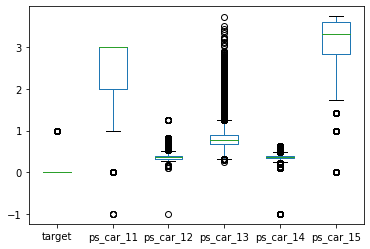

In [ ]:
df_ps_car.drop('id', axis=1).plot.box()

##**GRUPO 6**

In [ ]:
df_ps_car_cat = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_cal + lista_ps_cal_bin
df_ps_car_cat = df_ps_car_cat.drop(lista, axis=1)

df_ps_car_cat.describe()

,id,target,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674
std,4.293678e+05,0.187401,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455
min,7.000000e+00,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000
25%,3.719915e+05,0.000000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,7.435475e+05,0.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000
75%,1.115549e+06,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000
max,1.488027e+06,1.000000,11.000000,1.000000,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


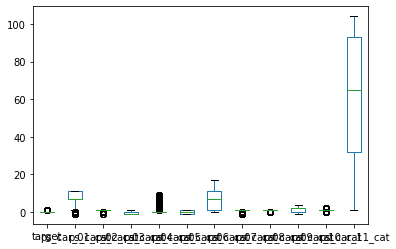

In [ ]:
df_ps_car_cat.drop('id', axis=1).plot.box()

Possível ver que a coluna com valores totalmente fora do padrão das demais é a "ps_car_11_cat", que possui valores listados de "0" à "100"

##**GRUPO 7**

In [ ]:
df_ps_cal = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal_bin
df_ps_cal = df_ps_cal.drop(lista, axis=1)

df_ps_cal.describe()

,id,target,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,4.293678e+05,0.187401,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,7.435475e+05,0.000000,0.500000,0.400000,0.500000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,1.115549e+06,0.000000,0.700000,0.700000,0.700000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,1.488027e+06,1.000000,0.900000,0.900000,0.900000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


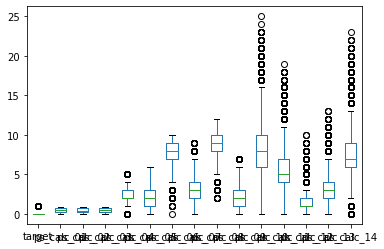

In [ ]:
df_ps_cal.drop('id', axis=1).plot.box()

##**GRUPO 8**

In [ ]:
df_ps_cal_bin = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal
df_ps_cal_bin = df_ps_cal_bin.drop(lista, axis=1)

df_ps_cal_bin.describe()

,id,target,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


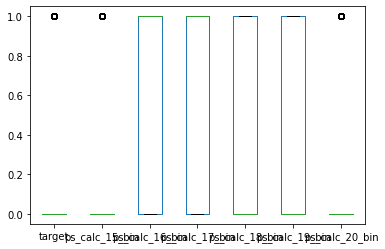

In [ ]:
df_ps_cal_bin.drop('id', axis=1).plot.box()

# ARQUIVO DE TESTE


---



In [ ]:
url = 'https://raw.githubusercontent.com/danilosrm/projeto_MDD/main/00%20-%20FONTES/02%20-%20TEST/test_01.csv'
  
df_test = pd.read_csv(url, error_bad_lines=False, delimiter=';')
  
url = 'https://raw.githubusercontent.com/danilosrm/projeto_MDD/main/00%20-%20FONTES/02%20-%20TEST/test_02.csv'
  
df2_test = pd.read_csv(url, error_bad_lines=False, delimiter=';')
  
df_test = df_test.append(df2_test)

In [ ]:
df_test.columns

In [ ]:
df_test.info()